# 제주 핫 플레이스 지도에 표시하기

## 1. 데이터 준비

In [1]:
import pandas  as pd
raw_df = pd.read_csv("data/제주핫플레이스.csv")
location_counts = raw_df.place.value_counts().to_frame()
print(location_counts.shape)
location_counts.head()

(1027, 1)


,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59


In [2]:
location_counts = raw_df.place.value_counts().to_frame()
print(location_counts.shape)
location_counts.head()

(1027, 1)


,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59


In [3]:
location_counts.tail()

,place
흑돼지가있는풍경,1
물꼬기,1
블랙하우스 떡볶이레스토랑,1
김녕 성세기 해변,1
디스이즈핫,1


In [4]:
location_counts = raw_df.place.value_counts().to_frame()
print(location_counts.shape)
location_counts.head()

(1027, 1)


,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59


In [5]:
location_counts.to_csv("location_counts.csv")

In [6]:
loc_df = pd.read_csv("location_counts.csv")
loc_df.columns = ["지명","빈도"]
loc_df.head()

,지명,빈도
0,Jeju,241
1,Jeju-do,172
2,Jungle Book by Alice,101
3,Seogwipo,65
4,제주도 크리스마스 박물관,59


## 2. 카카오 검색 API를 이용한 장소 검색
    - 키워드 장소 검색

In [7]:
filename = "kakaoapikey.txt"

In [8]:
with open(filename) as f:
    api_key = f.read()

In [9]:
import requests
from urllib.parse import quote

In [10]:
keyword = "정방폭포"
search_url = "https://dapi.kakao.com/v2/local/search/keyword.json"
url = f'{search_url}?query={quote(keyword)}'
# Authorization: KakaoAK {REST_API_KEY}
result = requests.get(url,
    headers={"Authorization": f"KakaoAK {api_key}"}).json()
result["documents"][0]

{'address_name': '제주특별자치도 서귀포시 동홍동 299-3',
 'category_group_code': '',
 'category_group_name': '',
 'category_name': '여행 > 관광,명소 > 폭포',
 'distance': '',
 'id': '10717401',
 'phone': '064-733-1530',
 'place_name': '정방폭포',
 'place_url': 'http://place.map.kakao.com/10717401',
 'road_address_name': '',
 'x': '126.571605283591',
 'y': '33.2449966137286'}

In [11]:
import numpy as np
import re

In [14]:
def find_place(keyword):
    url = f"{search_url}?query={quote(keyword)}"
    result = requests.get(url,
                headers={"Authorization": f"KakaoAK {api_key}"}).json()
    try:
        name = result["documents"][0]["place_name"]
        if "제주특별자치도" not in result["documents"][0]["address_name"]:
            lng = np.nan
            lat = np.nan
        else:
            lng = float(result["documents"][0]["x"])
            lat = float(result["documents"][0]["y"])
    except:
        print(keyword)
        name = ""
        lng = np.nan
        lat = np.nan

    return name, lng, lat, keyword

In [15]:
find_place("구좌지앵")

('구좌지앵', 126.90617413482926, 33.49540702573199, '구좌지앵')

In [16]:
re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]", "", "제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地")

'제주도 서귀포 중문관광단지 '

In [17]:
# loc_df에 공식명칭, 위도, 경도 정보 추가
name_list, lng_list, lat_list = [],[],[]
for place in loc_df.지명:
    place = re.sub("[^가-힣0-9 ]", "", place).strip()
    if place:
        name, lng, lat, _ = find_place(place)
    else:
        name, lng, lat = "", np.nan, np.nan
    name_list.append(name)
    lng_list.append(lng)
    lat_list.append(lat)

제주고궁한복카페
위미2리 동백군락지
제주 꿈꾸는고래 스쿠버게스트하우스
까사 린다 펜션
제주 성산 신산포구자연산횟집 회포장
함덕반하다
성산일출봉 게스트하우스 파티 띵까게스트하우스
해발1950 한라산 백록담
아날로그감귤체험
스윗슬로
애월해안가
2월22일 브런치카페
빨간모자마법사
붉은못허브팜   애월본점
윗세오름해발 1700
제스토리 바이제주 제주감성소품
쌀다방
제주 서귀포 그릴 데미그라스
비브레이브 커피 로스터즈
제주 조류공원 화조원
카페모리베이커스트리트
소자38
빌리엔젤 제주노형점
건축카페  섶섬이보이는
군산 정상
큰엉전망대쉼터
오샹띠
김녕 앞바다
서귀동 2985 세계의 가정식
미미본가
돈테일러익스프레
쭈니창고
카페바띠
라비에 와인비스트로
섶섬해녀할망카페
바굥식당
백리향백반
저녁정원
유민 아르누보 콜렉션
한화아쿠아넷
몽키비치
제주카페 스르륵
중문 마린파크 퍼시픽랜드
포근한우리집
헤이미쉬제주제주독채펜션
비양도 해녀촌
타시텔레
카페하도섬엠스테이펜션
호끌락80번지
제주초가집 곱들락
인공위성 제주
네이처캔바스
머스태쉬커피머스태쉬하우스
테라로사이사랑
제주 반디앤로제이 펜션  플라워브런치카페
원더먼트제주
평화통일불사리탑사
한라산 정상 해발 1950
하워드존슨 제주 연동 호텔
목수금토일
단디501
성산일출봉 코앞 쉼터
한복입는 선흘집
해물뚝배기전문 재암식당
블루마린하우스
제주도 하늘 위
핸드테일러 제주점
정방폭포가 보이는 암벽위
곽지스테이션
키아스마
미나마라
유채꽃사진촬영소
몽구네민박
제주도 올레길 6코스 이중섭거리
목포고을 제주도 흑돼지 끝나는 맛
카페 하도섬
성산수구레국밥
미풍해장국  중앙점
기원뚝배기
접대  저번에 우리가 만났던 그때
제주아트리움비밀의그림자공연
알뜨르프로젝트2018
유리의성과마법의숲
협제 혜변
다만프레르제주신화점
새별오름 정상
선화동1061
새우조나단
모던플레이스 리조트
제주도가는 비행기 안
동탄2에 산다
청초수물회섭국 신관
제주신화월드 메리어트 리조트관
블루밍아일랜드
8월의크리스마스 초원사진관
풍원 한라산볶음밥
의 한모신의 한모
제주마라도잠수함
릴리펏

In [18]:
loc_df["공식명칭"] = name_list
loc_df["위도"] = lat_list
loc_df["경도"] = lng_list
loc_df.head()

,지명,빈도,공식명칭,위도,경도
0,Jeju,241,,NaN,NaN
1,Jeju-do,172,,NaN,NaN
2,Jungle Book by Alice,101,,NaN,NaN
3,Seogwipo,65,,NaN,NaN
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.327858


In [19]:
# Null 데이터 유무 확인
loc_df.isnull().sum()

지명        0
빈도        0
공식명칭      0
위도      305
경도      305
dtype: int64

In [20]:
loc_df.isna().sum()

지명        0
빈도        0
공식명칭      0
위도      305
경도      305
dtype: int64

In [21]:
# Null 데이터 삭제
total_df = loc_df.dropna()        # Null 값이 있는 행을 삭제
total_df.isnull().sum().sum()

0

In [22]:
total_df.head()

,지명,빈도,공식명칭,위도,경도
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.327858
5,제주에인감귤밭,48,제주에인감귤밭,33.256561,126.539014
7,성산일출봉 城山日出峰 Seongsan Ilchulbong,36,성산일출봉,33.459135,126.940538
8,폼포코식당_pompokokitchen,30,폼포코식당,33.450408,126.919065
9,1100고지,25,한라산1100고지,33.358078,126.462220


## 3. 공식명칭으로 데이터 합치기

In [23]:
# 공식명칭 중복 여부
total_df.공식명칭.value_counts()[:10]

올레길 7코스(서귀포-월평 올레)    6
동문재래시장                4
함덕해수욕장                4
제주중문관광단지              3
천지연폭포                 3
우도                    3
비자림                   3
이호테우해수욕장              3
협재해수욕장                3
한라산국립공원               3
Name: 공식명칭, dtype: int64

In [24]:
df = total_df.pivot_table(index=["공식명칭","위도","경도"], values="빈도", aggfunc="sum")
df.head()

,,,빈도
공식명칭,위도,경도,
1158족욕카페,33.467075,126.336504,1
702키친,33.498835,126.534134,1
가드망제,33.500991,126.532954,1
가시식당,33.353060,126.771438,2
가시아방국수,33.438605,126.918065,3


In [25]:
df.reset_index(inplace=True)
df.공식명칭.value_counts()[:5]

1158족욕카페    1
제주돌문화공원     1
자매국수 본점     1
자연뜨락        1
자연스러운식당     1
Name: 공식명칭, dtype: int64

In [26]:
df.to_csv('공식명칭.csv', index=False)

## 4. folium 지도 시각화
    - 개별표시

In [27]:
df.sort_values(by="빈도", ascending=False).head(10)

,공식명칭,위도,경도,빈도
190,바이나흐튼 크리스마스박물관,33.291572,126.327858,59
465,제주에인감귤밭,33.256561,126.539014,48
270,성산일출봉,33.459135,126.940538,38
573,폼포코식당,33.450408,126.919065,30
597,한라산1100고지,33.358078,126.462220,25
407,위미동백나무군락,33.272939,126.674731,24
405,월정리해수욕장,33.556469,126.795805,22
383,올레길 7코스(서귀포-월평 올레),33.237386,126.515310,21
20,고집돌우럭 중문점,33.257981,126.416705,21
625,협재해수욕장,33.393866,126.239158,20


<AxesSubplot:>

C:\ProgramData\Anaconda3\envs\btfsop\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\envs\btfsop\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\envs\btfsop\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\btfsop\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\btfsop\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\btfsop\lib\site-packages\matplotlib\backend

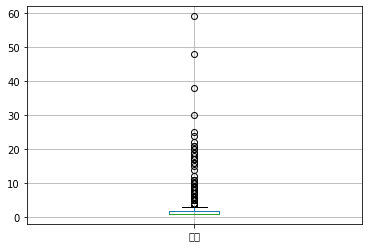

In [28]:
df[['빈도']].boxplot()

In [29]:
import folium

In [30]:
type(df.빈도[0])

numpy.int64

In [31]:
Mt_Hanla = [33.3625, 126.533694]
map = folium.Map(location=Mt_Hanla, zoom_start=11)

for i in df.index:
    folium.CircleMarker(
        radius=int(df.빈도[i]),               # int64는 처리 불가
        location=[df.위도[i], df.경도[i]],    # 위도, 경도
        popup=folium.Popup(df.공식명칭[i], max_width=200),
        tooltip=df.공식명칭[i],
        color="red"
    ).add_to(map)

title = '<h3 align="center" style="font-size:20px">제주도 핫 플레이스</h3>'
map.get_root().html.add_child(folium.Element(title))
map

In [46]:
map.save('제주도 핫플레이스(개별).html')

그룹으로 표시

In [48]:
from folium.plugins import MarkerCluster

locations, names = [], []
for i in df.index:
    locations.append([df.위도[i], df.경도[i]])
    names.append(df.공식명칭[i])

In [49]:
map = folium.Map(location=Mt_Hanla, zoom_start=11)
MarkerCluster(
    locations=locations, popups=names,
    name='제주', overlay=True, control=True
).add_to(map)
title = '<h3 align="center" style="font-size:20px">제주도 핫 플레이스</h3>'
map.get_root().html.add_child(folium.Element(title))
map

In [50]:
map.save('제주도 핫플레이스(그룹).html')